## Final Project Submission


* Student name: Annika Noren
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Exploratory Data Analysis
I will use basic python commands to load, view and learn about the data set, Kings' County Housing Data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
print(df.shape)
print(df.isna().sum())

(21597, 21)
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [ ]:
# Column Names and descriptions for Kings County Data Set
# * **id** - unique identified for a house
# * **date** - house was sold
# * **price** -  is prediction target
# * **bedrooms** -  of bedrooms
# * **bathrooms** -  of bathrooms
# * **sqft_living** -  footage of the home
# * **sqft_lots** -  footage of the lot
# * **floors** -  floors (levels) in house
# * **waterfront** - House which has a view to a waterfront
# * **view** - Has been viewed
# * **condition** - How good the condition is ( Overall )
# * **grade** - overall grade given to the housing unit, based on King County grading system
# * **sqft_above** - square footage of house apart from basement
# * **sqft_basement** - square footage of the basement
# * **yr_built** - Built Year
# * **yr_renovated** - Year when house was renovated
# * **zipcode** - zip
# * **lat** - Latitude coordinate
# * **long** - Longitude coordinate
# * **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
# * **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


/Users/Annika/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


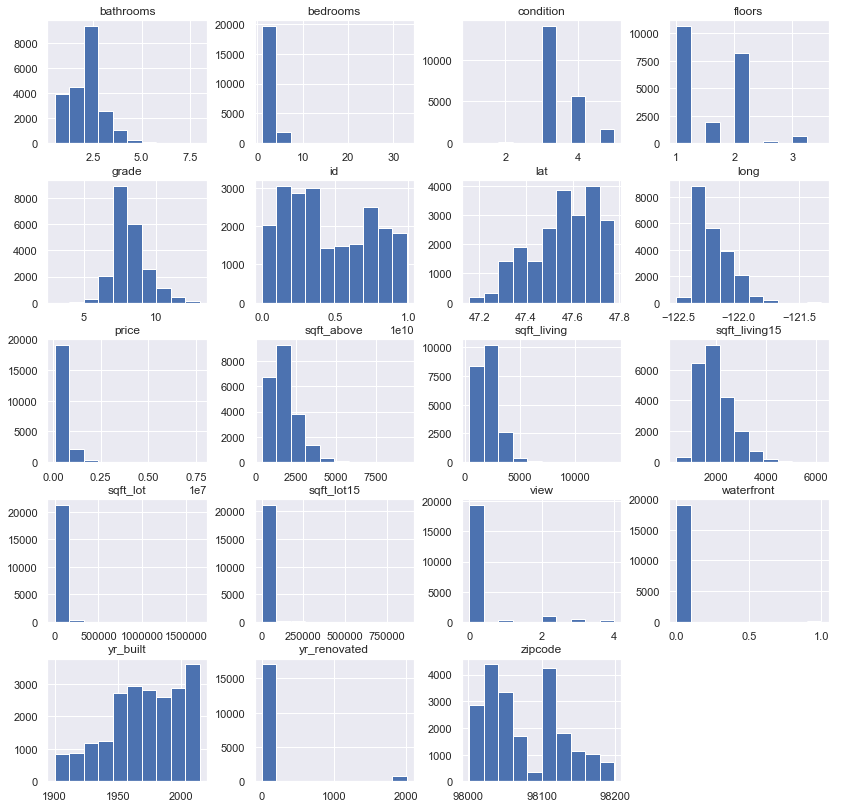

In [18]:
fig = plt.figure(figsize = (14,14))
ax = fig.gca()
df.hist(ax = ax);

#df.hist(figsize=(18,12) );

/Users/Annika/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


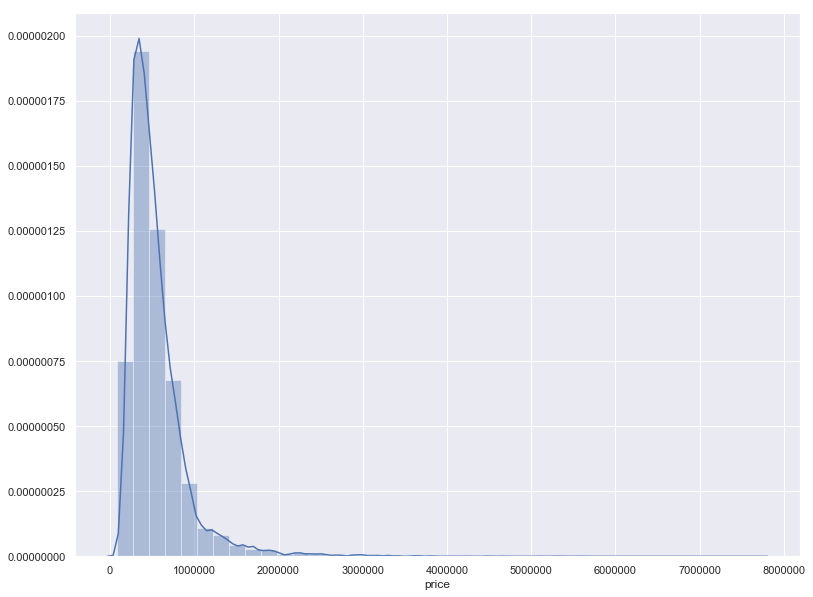

In [15]:
sns.set(rc={'figure.figsize':(13,10)})
sns.distplot(df['price'], bins=40)
plt.show()

### Summary of EDA
Kings County Housing is a large data set with 21597 rows of data and 21 columns of predictors and targets.  There appears to be: missing data, duplicate data, features that may be categorical and outliers. 
There is skewness and kurtosis in most features. 

The distribution of price is fairly normal, with some outliers.

Before working on linear regression, it will be a good idea to look at some features before working on predicting sales price of properties in Kings County Area.  

### First correlation

In [52]:
# df_first_corr = df.iloc[:,3:]
# df_first_corr.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [53]:
#corr_matrix = df_first_corr.corr()

In [54]:
#abs(corr_matrix) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False


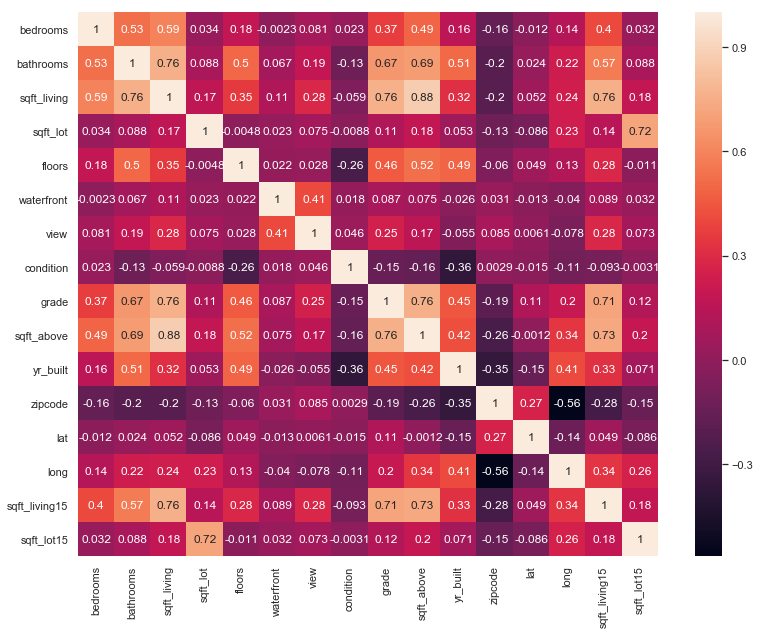

In [55]:
#sns.heatmap(data=corr_matrix, annot=True)

## Regression Before Cleaning

In [58]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~bedrooms


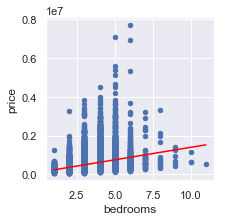

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~bathrooms


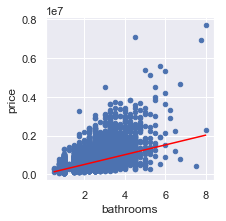

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_living


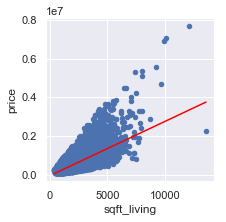

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_lot


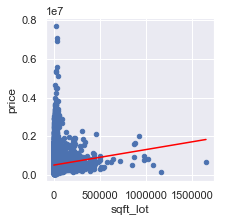

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~floors


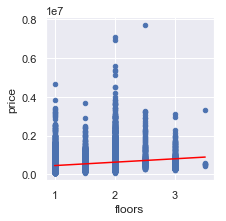

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~waterfront


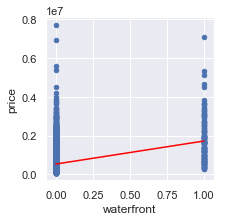

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~view


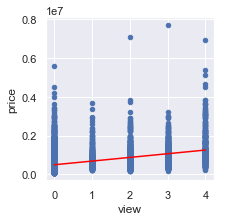

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~condition


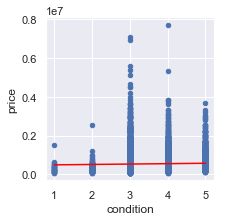

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~grade


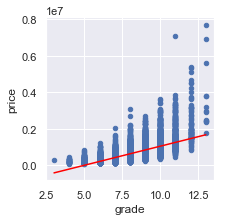

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_above


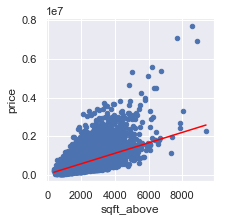

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~yr_built


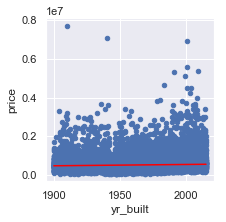

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~zipcode


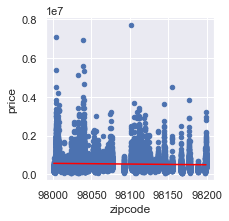

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~lat


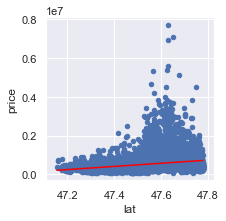

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~long


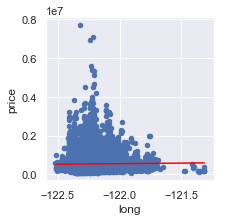

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_living15


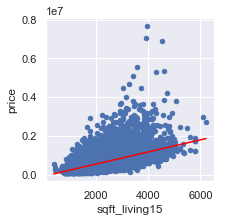

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_lot15


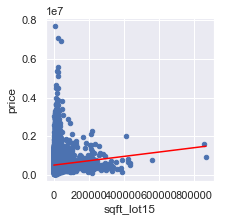

In [71]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
   
    
for i, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'waterfront','view','condition','grade','sqft_above',
                        'yr_built','zipcode','lat','long','sqft_living15','sqft_lot15']):
    print ("King County Data Set - Regression Analysis for price~" + val)
    
    f = 'price~' + val
    model = ols(formula=f, data=df).fit()
    
    new_val = pd.DataFrame({val : [df[val].min(),df[val].max()]})
    predictions = model.predict(new_val)
    df.plot(kind='scatter', x = val, y = 'price',figsize=(3,3))
    plt.plot(new_val,predictions,color='red')
    plt.show()
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    

In [69]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,bedrooms,0.0998267,107411,128384,0,1.16898e+06
2,bathrooms,0.276577,8712.65,251242,0,882736
3,sqft_living,0.492688,-43988.9,280.863,0,542663
4,sqft_lot,0.00807774,528258,0.797285,5.57162e-40,1.14771e+06
5,floors,0.0659481,279115,174809,0,1.25575e+06
6,waterfront,0.0763391,532642,1.18457e+06,0,894387
7,view,0.156605,495813,189193,0,1.00377e+06
8,condition,0.00130006,470868,20361.3,1.15656e-07,1.1368e+06
9,grade,0.446158,-1.06142e+06,209158,0,2.0439e+06


## Results of Regression Before Cleaning
The 5 best R-squared values are for sqft_living, grade, sqft_living15, sqft_above and bathrooms.  However, the highest value is only 0.50, with 1 being perfect, so there is hopefully room to improve.  SHOULD COMMENT ON HOMOSCEDASCITY.

# Data Cleaning

## Extraneous Data
There are three features - sqft_living, sqft_above and sqft_basement - that may be redundant.  The sum of above and basement equals living.   I orginally deleted the above and basement columns, which might have been a mistake.  Instead of deleting, I will just not use the basement since it has missing data and a great deal of zero data.

In [31]:
print(df['sqft_basement'].nunique())
print(df.sqft_basement.value_counts().head())

304
0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64


In [32]:
print(df['sqft_above'].nunique())
print(df.sqft_above.value_counts().head())

942
1300    212
1010    210
1200    206
1220    192
1140    184
Name: sqft_above, dtype: int64


In [ ]:
# del df['sqft_basement']
# del df['sqft_above']

The features of zipcode, latitude and longitude seem redundant.  Therefore, I will reduce the data set further and not use lat and long.  I originally deleted them, but feel it is better to not use the data than delete entirely.

In [33]:
# del df['lat']
# del df['long']

## Dealing with Missing and Duplicate Data
There are 3 features that are missing data: View (how many times the property has been viewed), Waterfront (is it a water front property or not) and Year Renovated.  There are also duplicate entries of properties with the same id.

### Checking for unique property id

In [34]:
print("Number of unique property ids: ", df['id'].nunique()) #there could be duplicated data
print('----')
      
print(df['id'].value_counts().head(3)) #there is one triplicate data, the others are duplicate

Number of unique property ids:  21420
----
795000620     3
1825069031    2
2019200220    2
Name: id, dtype: int64


In [35]:
duplicates = df[df.duplicated(subset='id')] 
print('There are {} occurances of duplicate house id numbers.'.format(len(duplicates))) #177 occurances of 21597
percent = round(len(duplicates) / len(df), 3) * 100
print('Percent of data that is duplicate: ', percent)

There are 177 occurances of duplicate house id numbers.
Percent of data that is duplicate:  0.8


Let's look at one property id (the one with 3 occurances) to see if it is duplicate data or not.  If the data is the same, the duplicate rows can be deleted.  Otherwise, we can keep the duplicated rows.

In [36]:
dupl_data = pd.read_csv("kc_house_data.csv", index_col ="id") 
rows = dupl_data.loc[795000620] 
print(rows)

                 date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
795000620   9/24/2014  115000.0         3        1.0         1080      6250   
795000620  12/15/2014  124000.0         3        1.0         1080      6250   
795000620   3/11/2015  157000.0         3        1.0         1080      6250   

           floors  waterfront  view  condition  grade  sqft_above  \
id                                                                  
795000620     1.0         0.0   0.0          2      5        1080   
795000620     1.0         0.0   0.0          2      5        1080   
795000620     1.0         NaN   0.0          2      5        1080   

          sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
id                                                                          
795000620           0.0      1950           0.0    98168  47.5045 -122.33   
795000620           0.0    

It looks like the duplicate data are an occurance each time the property is re-sold.  So, the property with 3 listings in the data sold in Septermber of 2014, December of 2014 and March of 2015.  No duplicate data will be deleted. 

In [37]:
# #The duplicate house ids will be deleted
# df = df.drop_duplicates(['id'], keep='last') #deleted the duplicate rows
# # print(df['id'].value_counts().head(3))
# # print(df['id'].nunique())
# print(df.info())

### Outliers
From the summary in the EDA, a few strange data points stood out.  In particular the property with 33 bedrooms and the one with 8 bathrooms (two seperate properties.)  

In [40]:
bed_outlier = df.loc[df['bedrooms'] >= 10]
bath_outlier = df.loc[df['bathrooms'] > 6.50]
print("Bedroom outliers: ")
print(bed_outlier)
print('-----------------')
print("Bathroom outliers: ")
print(bath_outlier)

Bedroom outliers: 
               id        date      price  bedrooms  bathrooms  sqft_living  \
8748   1773100755   8/21/2014   520000.0        11       3.00         3000   
13301   627300145   8/14/2014  1150000.0        10       5.25         4590   
15147  5566100170  10/29/2014   650000.0        10       2.00         3610   
15856  2402100895   6/25/2014   640000.0        33       1.75         1620   
19239  8812401450  12/29/2014   660000.0        10       3.00         2920   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
8748       4960     2.0         0.0   0.0     ...          7        2400   
13301     10920     1.0         0.0   2.0     ...          9        2500   
15147     11914     2.0         0.0   0.0     ...          7        3010   
15856      6000     1.0         0.0   0.0     ...          7        1040   
19239      3745     2.0         0.0   0.0     ...          7        1860   

       sqft_basement yr_built  yr_renovated  zipcode   

There are a handful of homes that have a very high number of bedrooms and bathrooms. There is no way of being sure if the data is accurate or not.  The only property that is probably has incorrect data is the one with 33 bedrooms.  Given that there are less than 2 full baths associated with the property is likely that '33' is supposed to be '3'.  Therefore, one data point will be changed, but all other date will be remain. The property that has 8 bathrooms also has 7 bedrooms so it may be some type of hotel or AirBNB, and could be an actual property.  

In [41]:
df.bedrooms = df.bedrooms.replace({33: 3})
#print(df.loc[df['id'] == 2402100895])

### Checking values for Waterfront,  View and Yr_Renovated

In [42]:
print(df['waterfront'].value_counts()) #Is 1 is waterfrontview and 0 not a view?
print(df['waterfront'].isna().sum())# 2353 NaN values, 146 as "1" and 189921 as "0" but don't know what that means

0.0    19075
1.0      146
Name: waterfront, dtype: int64
2376


There are 18,921 properties with a '0' for waterfront, 146 with a '1' and 2,353 with no value. Since Waterfront is a categorical column and there isn't key to identify what 1 and 0 represent, I'll leave the missing values for now and revisit if it seems to be a problem.  Or assume 0 means no view and high percentage have no view, so it is feature to ignore.

In [43]:
#print(df['view'].nunique())#5
print(df['view'].value_counts())
print(df['view'].isna().sum())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
63


There are 5 categories for the view feature with 63 null values (between 0 and 4 viewings.)  Since this is a categorical column and we do not know the true meaning of the assigned category (assumptions can be made - it represents the number of times a property has been shown to prospective buyers), I'll leave the missing values for now and revisit if it seems to be a problem.  Most properties have not been viewed and there isn't an indication of a relationship between date and viewed, so this feature will not be used.

In [44]:
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].isna().sum())

70
3842


There are 3,813 missing values.  In place of making up data, I will replace the data with "0", meaning there was no renovation at all.

In [45]:
df['yr_renovated'] = df['yr_renovated'].fillna(value='0')
print(df['yr_renovated'].isna().sum())
# print(df['yr_renovated'].value_counts())

0


# Result of Cleaning 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


### Identify Categorial Data
        I will use scatterplots to identify the categorial features. Some features do not represent a continues number, but a class or state.   MAYBE THIS NEEDS TO BE MOVED UP TO BEFORE CLEANING AND DO REGRESSION BEFORE ANTHING ELSE.  IS THE BEFORE LINEAR REGRESSION.  THE GRAPHS SHOW WHICH ARE LINEAR.   

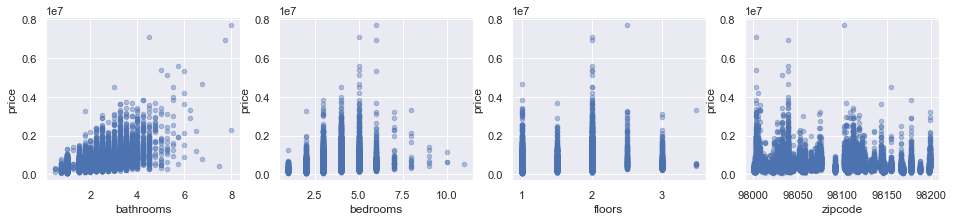

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bathrooms', 'bedrooms','floors','zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')    

In [48]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

# for xcol, ax in zip(['lat','long', 'zipcode'], axes):
#     df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')  

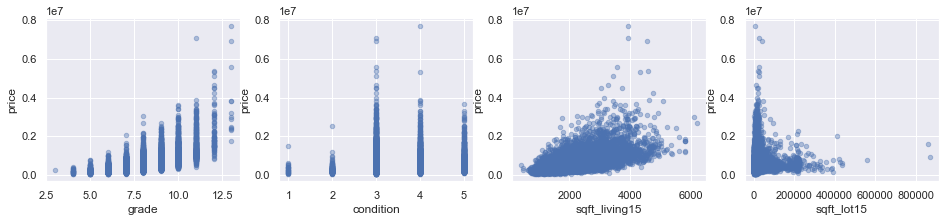

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'condition','sqft_living15','sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b') 

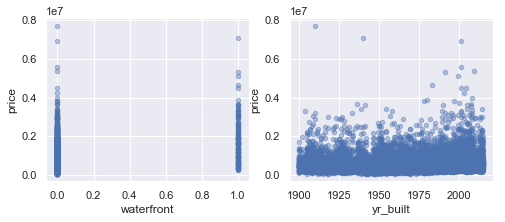

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

for xcol, ax in zip(['waterfront','yr_built'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b') 

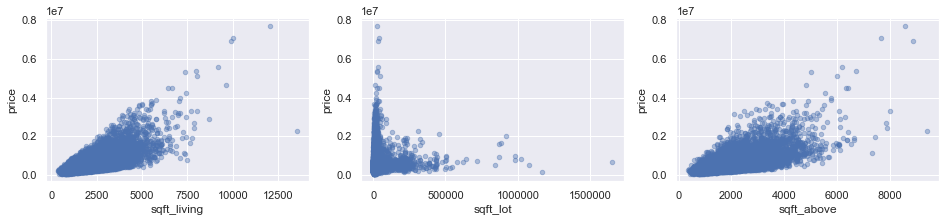

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot','sqft_above'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b') 

### Creating dummy variables for Waterfront and Condition 
Below the data for waterfront and condition will be put into categories.  Further down the data for grade will be put in bins.

In [ ]:
#view_dummy = pd.get_dummies(df["view"], prefix="V")
#grade_dummy = pd.get_dummies(df["grade"], prefix="G")

condition_dummy = pd.get_dummies(df["condition"], prefix="C")
waterfront_dummy = pd.get_dummies(df["waterfront"], prefix="W")

In [ ]:
df_categories = pd.concat([waterfront_dummy, condition_dummy], axis=1)
df_categories.head()

### Creating bins for grade
There are 11 grades, with 3 being the lowest number and 13 the highest. There is no 0 or 1.  

In [ ]:
print("Unique number of grades: ", df["grade"].nunique())
print('------------------------')
print(df.grade.value_counts())
print('------------------------')
print("Median grade value: ", df.grade.median())

In [ ]:
gr_bins = [3, 7, 13]
bins_grade = pd.cut(df['grade'], gr_bins)
bins_grade = bins_grade.cat.as_ordered()
bins_grade.head()

In [ ]:
bins_grade.value_counts().plot(kind='bar')

In [ ]:
grade_dummy = pd.get_dummies(gr_bins, prefix="G")
df_categories = pd.concat([df_categories, grade_dummy], axis=1)
df_categories.head()

### Creating bins for yr_built
Since there are so many values for years that properties were built, instead of creating dummy variables it may be better to create bins for the data. 

In [ ]:
print(df["yr_built"].nunique())
#print(df.yr_built.value_counts()) 

In [ ]:
# bins = [1901, 1940, 1955, 1970, 1985, 2000, 2020]
bins = [1901, 1955, 1995,2020]
bins_yr_built = pd.cut(df['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_ordered()
yr_built_dummy = pd.get_dummies(bins_yr_built, prefix="B")
df_categories = pd.concat([df_categories, yr_built_dummy], axis=1)
#bins_yr_built.head()

In [ ]:
bins_yr_built.value_counts().plot(kind='bar')

In [ ]:
df_categories.head()
# yr_built_dummy = pd.get_dummies(bins_yr_built, prefix="yr_b")
# # df["yr_built"]=bins_yr_built
# # df.iloc[0:5,9:20]
# df = df.drop(['yr_built'], axis=1)
# df = pd.concat([df,yr_built_dummy], axis=1)
# df.head()

In [ ]:
#drop old columns and concat with new columns
# df = df.drop([waterfront','grade','condition'], axis=1)
# df = pd.concat([df,view_dummy, waterfront_dummy,grade_dummy,condition_dummy], axis=1)
# df.head()

### Reducing the size of the dataset
I'm going to delete some columns that I think are useless so I get move forward with a correlation

In [ ]:
df_features = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_above','sqft_lot', 'floors','yr_built',
                  'yr_renovated','zipcode', 'sqft_living15', 'sqft_lot15']].copy()

In [ ]:
df_features.head()


In [ ]:
pd.plotting.scatter_matrix(df_features,figsize  = [8,8]);

In [ ]:
pd.plotting.scatter_matrix(df_categories,figsize  = [8,8]);

Maybe the 4 categories features don't matter?  I'll move forward.


In [ ]:
df_features.corr()

In [ ]:
abs(df_features.corr()) > 0.75

The problematic features seems to be bathrooms (2 true), sqft_living (3 true) and sqft_living15 (2 true).  It feels counter-intuitive to remove bathrooms or sqft_living.

In [ ]:
df_less_features = df_features[['bedrooms', 'bathrooms', 'sqft_above','sqft_lot', 'floors','yr_built',
                  'yr_renovated','zipcode', 'sqft_living15', 'sqft_lot15']].copy()

In [ ]:
df_less_features.corr()
abs(df_less_features.corr()) > 0.75